## Data Analysis Question: Which month has Africa recorded its Highest Covid-19 cases?

Source: EU Open Data Portal(data.europa.eu)

Data Analyst: Alex Idachaba

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
# Import dataset
covid = pd.read_csv('COVID_19.csv')
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
1,31/05/2020,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
2,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
3,29/05/2020,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
4,28/05/2020,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia


In [33]:
# Check for duplicate rows
covid.duplicated().any()

False

In [34]:
# Rename country column
covid.rename(columns={'countriesAndTerritories':'countries'}, inplace=True)
covid.head(3)

,dateRep,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continentExp
0,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
1,31/05/2020,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
2,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia


In [35]:
# Extract all the Africa data
continent = covid['continentExp'] == 'Africa'
africa = covid[continent]
africa.head(3)

,dateRep,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continentExp
229,01/06/2020,1,6,2020,127,7,Algeria,DZ,DZA,42228429.0,Africa
230,31/05/2020,31,5,2020,133,8,Algeria,DZ,DZA,42228429.0,Africa
231,30/05/2020,30,5,2020,137,8,Algeria,DZ,DZA,42228429.0,Africa


In [36]:
 # Check the unique values in the month column
africa['month'].unique()

array([ 6,  5,  4,  3,  2,  1, 12], dtype=int64)

In [37]:
# Drop all 12th month of 2019 included in the data(using index number)
africa[africa['month'] == 12]

,dateRep,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continentExp
377,31/12/2019,31,12,2019,0,0,Algeria,DZ,DZA,42228429.0,Africa
5934,31/12/2019,31,12,2019,0,0,Egypt,EG,EGY,98423595.0,Africa
14113,31/12/2019,31,12,2019,0,0,Nigeria,NG,NGA,195874740.0,Africa


In [38]:
africa = africa.drop(labels=[377,5934,14113],axis=0)

In [39]:
# Get the total cases for each month in Africa
month = africa.groupby(['month'])
month.sum()

,day,year,cases,deaths,popData2018
month,,,,,
1,1488,187860,0,0,1.043233e+10
2,1305,175740,3,0,9.759276e+09
3,16412,1460460,5134,166,2.212910e+10
4,24266,3131000,31598,1425,3.794798e+10
5,27174,3413800,104887,2480,3.936967e+10
6,55,111100,5374,151,1.270968e+09


In [40]:
month['cases'].sum()

month
1         0
2         3
3      5134
4     31598
5    104887
6      5374
Name: cases, dtype: int64

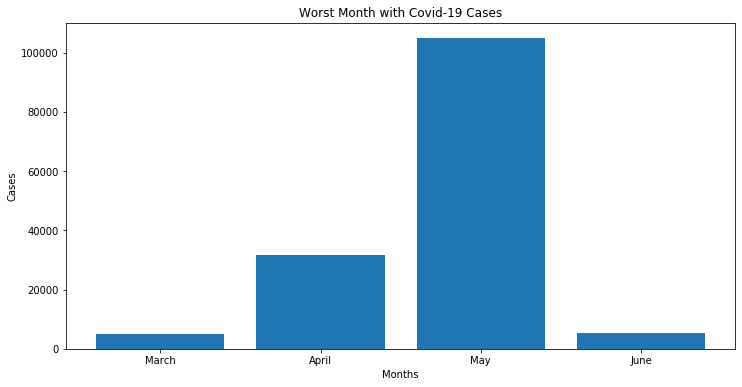

In [41]:
# Lets plot a bar graph to visualize our findings
plt.figure(figsize=(12,6))
plt.title('Worst Month with Covid-19 Cases')
cases = month['cases'].sum()[2:6]
months = [ 'March', 'April', 'May','June']
plt.bar(months, cases )
plt.xlabel('Months')
plt.ylabel('Cases')
plt.show()

So far Africa has recorded its worst covid 19 cases in the month of May 2020. With the month of May having the most cases at  104,887.